**Tree based models for house price prediction**

STAT 6000 Project

Project Members:
1. Dinesh Neupane
2. Dikshya Panta
3. Asmita Priyadarshini Khatiwada

INTRO:
We  are using the house price dataset from Kaggle to demonstrate the use of tree based methods for prediction of house prices. The dataset contains information on the sales prices of houses based on their distinct features.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stat6000/train.csv", index_col="Id")
df_test = pd.read_csv("/content/drive/MyDrive/stat6000/test.csv", index_col="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Exploratory Data Analysis:
Now we are going to do the exploratory data analysis. In this section we will look into the amount of rows/columns in the dataset, type of the data in each column and we will handle in case of any missing dataset.


In [ ]:
df.shape

(1460, 80)

In [ ]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 80 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), object(43)
memory usage: 923.9+ KB


Lets find out the key statististics of the data using describe( function )

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.describe(include=[object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


now we want to handle if there is any missing dataset.


In [ ]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

As we can see there are some missing data in some columns. Lets draw a bar chart that shows how many data in missing in which columns:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageCond'),
  Text(8, 0, 'GarageType'),
  Text(9, 0, 'GarageFinish')])

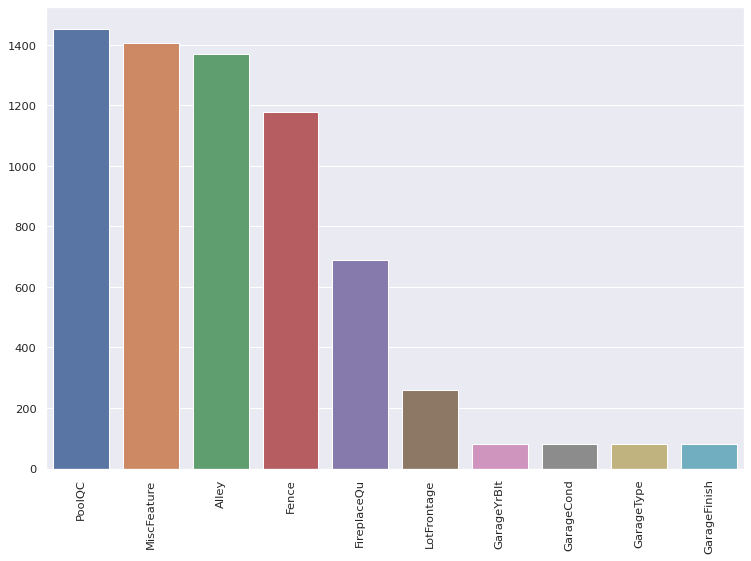

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set(rc={'figure.figsize':(12,8), 'figure.dpi':75})
cols_with_null=df.isnull().sum().sort_values(ascending=False).head(10)
sns.barplot(x=cols_with_null.index,y=cols_with_null)
plt.xticks(rotation=90)

The PoolQC column has the highest number of missing dataset. Now lets drop the columns with the highest counts of null values (up to 6 columns) from the DataFrame

In [ ]:
cols_to_drop=(cols_with_null.head(6).index).tolist()
df.drop(cols_to_drop,axis=1,inplace=True)

Now we are going to create a feature and target variable i.e. X and y



In [ ]:
y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

Now we have the target and feature variable, we want to split it to training and testing dataset. For this we are using sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=0)

Lets view the dimensions of training and testing dataset.


In [ ]:
print(X_train.shape)
print(X_val.shape)

(1168, 73)
(292, 73)


There are two types of columns in data. (numerical and categorical).

In [ ]:
categorical_cols = [cname for cname in X_train.columns
                    if X_train[cname].nunique() < 10 and X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns
                    if X_train[cname].dtype in ['int64', 'float64']]

In [ ]:
print("Total categorical columns:", len(categorical_cols))
print("Total numerical columns:", len(numerical_cols))

Total categorical columns: 35
Total numerical columns: 35


Now we want to select the columns from the datasets.

In [ ]:
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_val= X_val[my_cols].copy()
X_test = df_test[my_cols].copy()

**DATA PREPROCESSING**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Scaler to scale the dataset, imputter to fill in the empty values.

For numerical data columns:

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

For categorical data columns:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Performing the transformation:

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)])

**Decision Tree Model:**
Definition: A tree-like structure that classifies or predicts based on features and their values.
Mechanism: Recursively splits data based on feature values until clear classification or prediction emerges.
(Reference: https://rafalab.dfci.harvard.edu/pages/649/section-11.pdf)

Train the model and make predictions on validation set:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

model_dt = DecisionTreeRegressor(random_state=0)
my_pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('model_dt', model_dt)])
my_pipeline_dt.fit(X_train, y_train)
y_val_pred_dt= my_pipeline_dt.predict(X_val)

Calculate model Metrices:

In [ ]:
r_squared = r2_score(y_val, y_val_pred_dt)
print("Validation r squared:", np.round(r_squared, 2))

mse = mean_squared_error(y_val, y_val_pred_dt)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Validation r squared: 0.82
Mean Squared Error (MSE): 1248962759.1917808
Root Mean Squared Error (RMSE): 35340.66721486425


**Tree Plot**

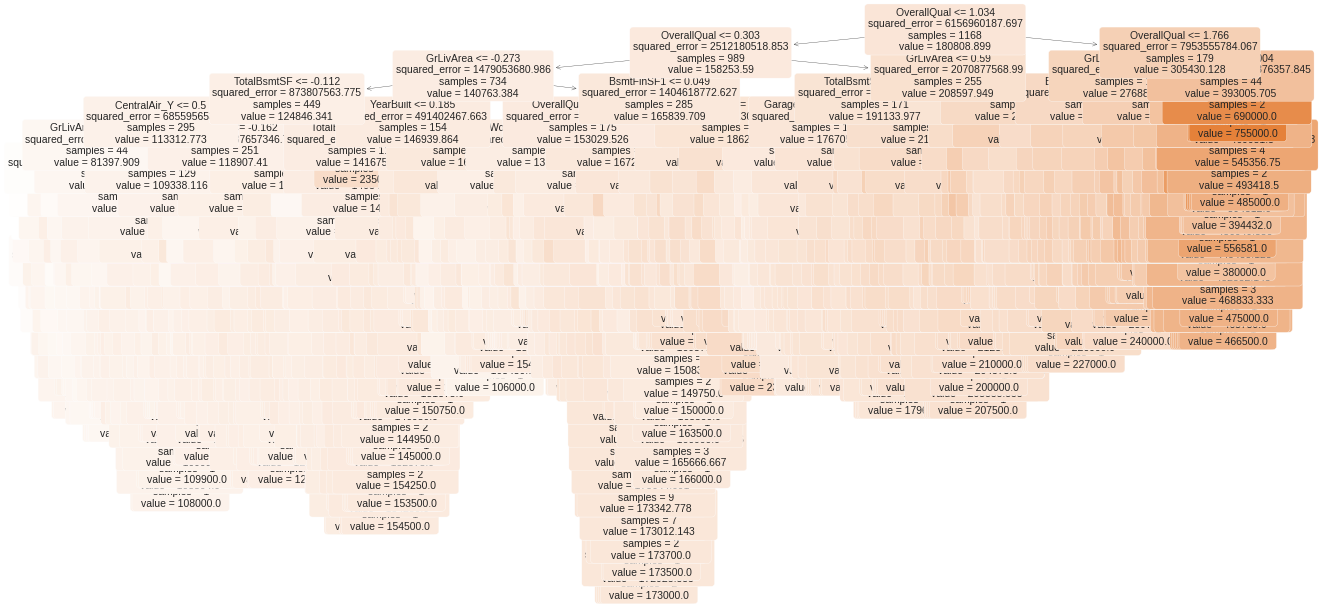

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_model = my_pipeline_dt.named_steps['model_dt']

categorical_cols_after_encoding = list(my_pipeline_dt.named_steps['preprocessor']
                                      .named_transformers_['cat']
                                      .named_steps['onehot']
                                      .get_feature_names_out(input_features=categorical_cols))

all_feature_names = numerical_cols + categorical_cols_after_encoding

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=all_feature_names, filled=True, rounded=True, fontsize=10)
plt.show()

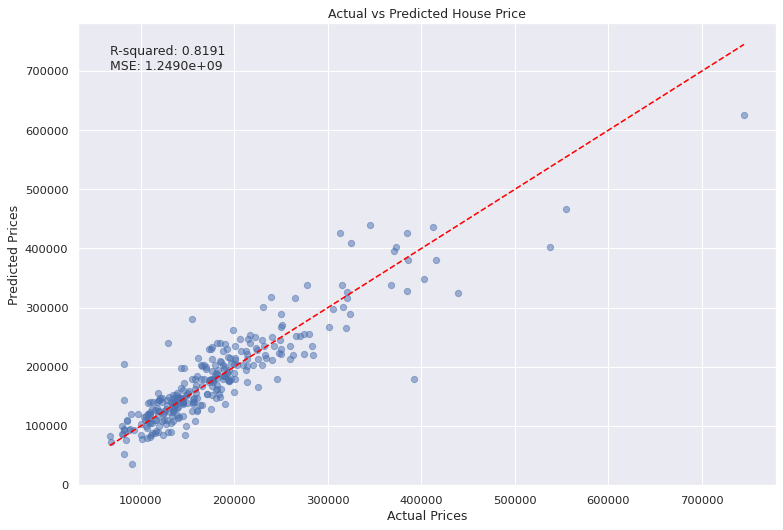

In [ ]:
# Scatter plot
plt.scatter(y_val, y_val_pred_dt, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs Predicted House Price')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Express MSE in terms of "e" and display on the plot
mse_in_terms_of_e = f'MSE: {mse:.4e}'
plt.text(min(y_val), max(y_val), f'R-squared: {r_squared:.4f}\n{mse_in_terms_of_e}', verticalalignment='top', horizontalalignment='left')

plt.show()

Decision Tree model optimisation:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

# Create a pipeline with your DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=0)
my_pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('model_dt', model_dt)])

param_grid = {
    'model_dt__max_depth': [1, 5, 7, 9, 11, 13, 15, 20],
    'model_dt__min_samples_leaf': [1, 5, 10, 15, 20, 50, 100]
}

# Define the scoring metric. You can use 'neg_mean_squared_error' for mean squared error.
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Create the GridSearchCV object
grid_search = GridSearchCV(my_pipeline_dt, param_grid, cv=5, scoring=scoring)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters: ", best_params)
y_val_pred_dt = best_model.predict(X_val)

Best Parameters:  {'model_dt__max_depth': 11, 'model_dt__min_samples_leaf': 10}


In [ ]:
r_squared = r2_score(y_val, y_val_pred_dt)
print("Validation r squared:", np.round(r_squared, 2))

mse = mean_squared_error(y_val, y_val_pred_dt)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Validation r squared: 0.73
Mean Squared Error (MSE): 1850626223.0512462
Root Mean Squared Error (RMSE): 43018.905414378525


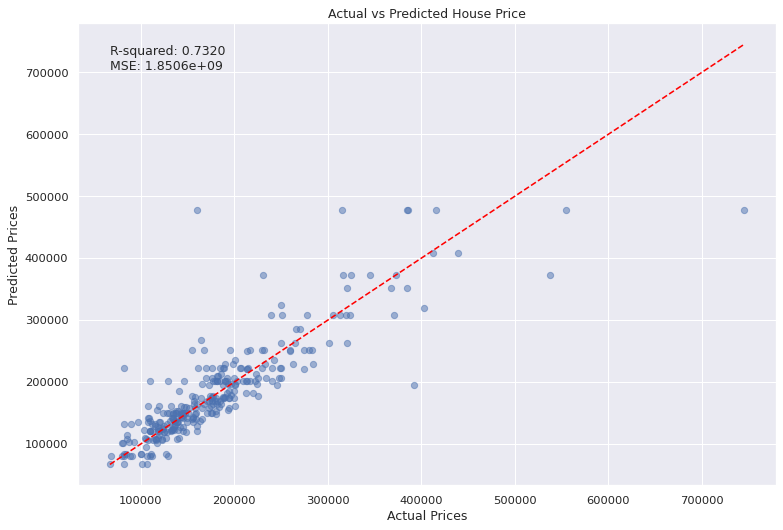

In [ ]:
# Scatter plot
plt.scatter(y_val, y_val_pred_dt, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs Predicted House Price')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Express MSE in terms of "e" and display on the plot
mse_in_terms_of_e = f'MSE: {mse:.4e}'
plt.text(min(y_val), max(y_val), f'R-squared: {r_squared:.4f}\n{mse_in_terms_of_e}', verticalalignment='top', horizontalalignment='left')

plt.show()

**Random Forest Model:**

The random forest is a popular supervised machine learning algorithm extensively applied to address both classification and regression challenges. Conceptually, it can be envisioned as a collection of decision trees. While individual decision tree models may exhibit overfitting tendencies to the training data, the random forest mitigates this issue effectively.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=0)

# Create the full pipeline with preprocessing and the Random Forest Regressor
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_rf', model_rf)
])

# Fit the pipeline on the training data
full_pipeline.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_rf = full_pipeline.predict(X_val)

In [ ]:
r_squared = r2_score(y_val, y_val_pred_rf)
print("Validation r squared:", np.round(r_squared, 2))

mse = mean_squared_error(y_val, y_val_pred_rf)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Validation r squared: 0.83
Mean Squared Error (MSE): 1152807301.2995164
Root Mean Squared Error (RMSE): 33953.01608546016


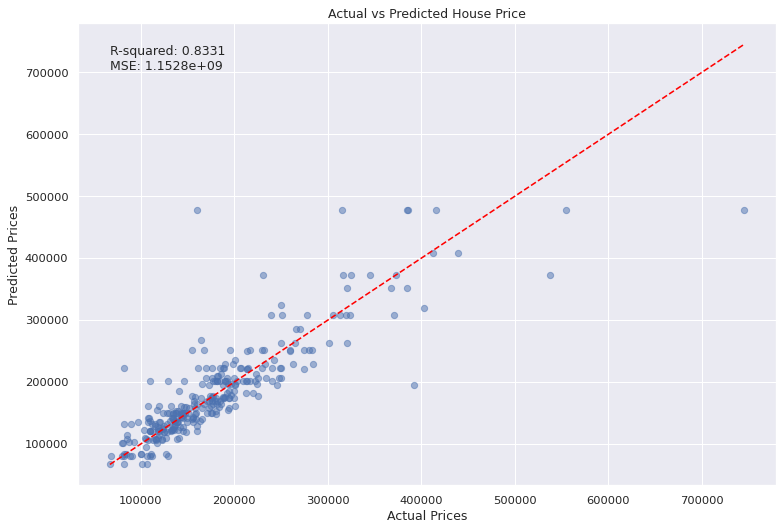

In [ ]:
# Scatter plot
plt.scatter(y_val, y_val_pred_dt, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs Predicted House Price')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Express MSE in terms of "e" and display on the plot
mse_in_terms_of_e = f'MSE: {mse:.4e}'
plt.text(min(y_val), max(y_val), f'R-squared: {r_squared:.4f}\n{mse_in_terms_of_e}', verticalalignment='top', horizontalalignment='left')

plt.show()

**Feature importance:**

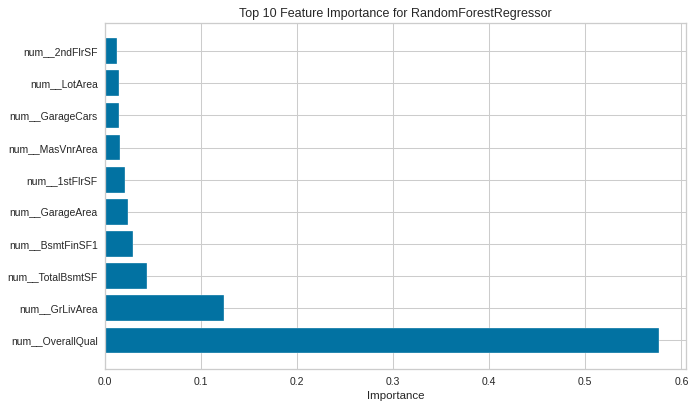

In [ ]:
feature_importances = model_rf.feature_importances_

preprocessor_columns = full_pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)

feature_importance_df = pd.DataFrame({'Feature': preprocessor_columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)

# Plot the feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance for RandomForestRegressor')
plt.show()